In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
#from scikeras.wrappers import KerasRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
#load dataset
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

In [ ]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
%store -r pv_eff

In [ ]:
print(X[:2,:])
print(Y[:2])
print(len(pv_eff))

  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K


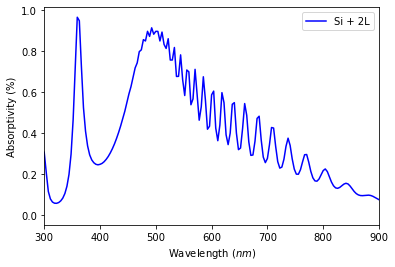

In [40]:
from numpy import random
from wptherml.wpml import multilayer
from wptherml.datalib import datalib
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import basinhopping
import numpy as np
import time

### Define a 2 micron silicon slab with a SiO2 and AlN coating...
### we will optimize over the SiO2 and AlN coatings only.
### Si with 2-layer AR coating
dof2_structure = {
        'Material_List' : ['Air', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN', 'SiO2', 'AlN','SiO2', 'Si','Air'],
        ### Thicknesses just chosen arbitrarily, replace with "optimal" values
        'Thickness_List': [0,10.14e-9, 35.70e-9, 10.14e-9, 10.14e-9, 35.70e-9, 20e-9, 5e-9, 3e-9, 2000e-9, 0],
        'Lambda_List': [300e-9, 4000e-9, 1000]
        }

pv_2l = multilayer(dof2_structure)
plt.plot(pv_2l.lambda_array*1e9, pv_2l.emissivity_array, 'blue', label='Si + 2L')
plt.xlim(300,900)
plt.ylabel('Absorptivity (%)')
plt.xlabel('Wavelength ($nm$)')
plt.legend()

dim = 789

PV_X = np.zeros((dim,8))
PV_Y = np.zeros(dim)
idx = 0
f = open('pv.csv', 'w')
for i in range(0, dim):
    d1 = random.uniform(1, 400)
    d2 = random.uniform(1, 400)
    d3 = random.uniform(1, 400)
    d4 = random.uniform(1, 400)
    d5 = random.uniform(1, 400)
    d6 = random.uniform(1, 400)
    d7 = random.uniform(1, 400)
    d8 = random.uniform(1, 400)
    # do two more random number draws
    # two more set widths
    pv_2l.d[1] = d1 * 1e-9
    pv_2l.d[2] = d2 * 1e-9
    pv_2l.d[3] = d3 * 1e-9
    pv_2l.d[4] = d4 * 1e-9
    pv_2l.d[5] = d5 * 1e-9
    pv_2l.d[6] = d6 * 1e-9
    pv_2l.d[7] = d7 * 1e-9
    pv_2l.d[8] = d8 * 1e-9
    pv_2l.fresnel()
    pv_2l.pv_conversion_efficiency()
    PV_X[idx,0] = d1 / 400.
    PV_X[idx,1] = d2 / 400.
    PV_X[idx,2] = d3 / 400.
    PV_X[idx,3] = d4 / 400.
    PV_X[idx,4] = d5 / 400.
    PV_X[idx,5] = d6 / 400.
    PV_X[idx,6] = d7 / 400.
    PV_X[idx,7] = d8 / 400.
    PV_Y[idx] = pv_2l.conversion_efficiency_val
    pr_str = str(d1/400) + "," + str(d2/400) + "," + str(d3/400) + ","
    pr_str += str(d4/400) + "," + str(d5/400) + "," + str(d6/400) + ","
    pr_str += str(d7/400) + "," + str(d8/400) + "," + str(pv_2l.conversion_efficiency_val)
    pr_str += "\n"
    f.write(pr_str)
    #f.write(str(d1/400),",",str(d2/400),",",str(d3/400),",",str(d4/400),",",
    #       str(d5/400),",",str(d6/400),",",
    #       str(d6/400),",",str(d8/400),",",
    #       str(pv_2l.conversion_efficiency_val))
    idx += 1
    
f.close()
        

In [15]:
print(PV_Y*100)

[3.77450717 4.79812547 4.76017384 ... 5.729187   5.48454298 6.51403188]


In [29]:
# define the keras model
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(PV_X, PV_Y, epochs=20, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(PV_X, PV_Y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
40/40 [==============================] - 0s 724us/step - loss: 0.5384 - accuracy: 0.0000e+00
Epoch 2/20
40/40 [==============================] - 0s 754us/step - loss: 0.4383 - accuracy: 0.0000e+00
Epoch 3/20
40/40 [==============================] - 0s 758us/step - loss: 0.3436 - accuracy: 0.0000e+00
Epoch 4/20
40/40 [==============================] - 0s 726us/step - loss: 0.2671 - accuracy: 0.0000e+00
Epoch 5/20
40/40 [==============================] - 0s 691us/step - loss: 0.2214 - accuracy: 0.0000e+00
Epoch 6/20
40/40 [==============================] - 0s 688us/step - loss: 0.2043 - accuracy: 0.0000e+00
Epoch 7/20
40/40 [==============================] - 0s 687us/step - loss: 0.2004 - accuracy: 0.0000e+00
Epoch 8/20
40/40 [==============================] - 0s 674us/step - loss: 0.1997 - accuracy: 0.0000e+00
Epoch 9/20
40/40 [==============================] - 0s 656us/step - loss: 0.1994 - accuracy: 0.0000e+00
Epoch 10/20
40/40 [==============================] - 0s 668us/st

In [30]:
d1 = random.uniform(1, 400)
d2 = random.uniform(1, 400)
pv_2l.d[1] = d1 * 1e-9
pv_2l.d[2] = d2 * 1e-9
pv_2l.fresnel()
pv_2l.pv_conversion_efficiency()
X_TEST = np.array([d1 / 400., d2 / 400.])
Y_TEST = np.array([pv_2l.conversion_efficiency_val])


Y_GUESS = model.predict(PV_X)
mse = (np.square(Y_GUESS - PV_Y)).mean(axis=None)
print(mse)

0.00022936344798122984


In [ ]:
# define base model
def pv_model():
    # create model
    model = Sequential()
    model.add(Dense(2, input_dim=2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
estimator = KerasRegressor(build_fn=pv_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, PV_X, PV_Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))